<a href="https://colab.research.google.com/github/nikitasavaliya87/Data-Science-Course/blob/main/task_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [2]:
data=pd.read_csv('https://tinyurl.com/2pfhncqw')


In [4]:
data.head(5)


,Unnamed: 0,rarity_score,last_sale_date,last_sale_price,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
0,0,2.000000,2022-11,1.266732,1,2022-04,verified,2,own,1000.0,250,False,False,True,True,False,31,187.967742,8.290323,60.935484,0,0,2,591,28,380
1,1,97.077216,2021-08,1.200357,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
2,2,139.453086,2022-08,3.180572,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
3,3,127.753445,2021-08,3.502910,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
4,4,112.315719,2022-09,4.009567,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239


In [5]:
data.pivot_table(index='verification_status', columns= "contract_type", values=["rarity_score","last_sale_price"], aggfunc='sum')

last_sale_price                 rarity_score              
contract_type               default            own       default           own
verification_status                                                           
approved                 658.931935    1684.819488  3.973082e+08  3.929607e+06
verified                 370.304092  667394.862655  2.475007e+06  4.165654e+07

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: https://tinyurl.com/2r24n45l. Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that is represented to the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [6]:
data=pd.read_csv("https://tinyurl.com/2r24n45l")
data.head()

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990


In [7]:
data.pivot_table(index='Name', columns=['Year','Price'], aggfunc='sum')

Miles                              \
Year                               2009                                   
Price                                11990  12590  12990  13590  13990    
Name                                                                      
Acura ILX                               NaN    NaN    NaN    NaN    NaN   
Acura MDX                               NaN    NaN    NaN    NaN    NaN   
Acura MDX Sport Hybrid                  NaN    NaN    NaN    NaN    NaN   
Acura RDX                               NaN    NaN    NaN    NaN    NaN   
Acura RLX                               NaN    NaN    NaN    NaN    NaN   
...                                     ...    ...    ...    ...    ...   
Volvo V                                 NaN    NaN    NaN    NaN    NaN   
Volvo XC                                NaN    NaN    NaN    NaN    NaN   
smart fortwo                            NaN    NaN    NaN    NaN    NaN   
smart fortwo electric drive             NaN    NaN    NaN    NaN    NaN   
smart fortwo electric drive cabrio      NaN    NaN    NaN    NaN    NaN   

                                                                              \
Year                                                                           
Price                              14590  14990  15590  16590  16990  18990    
Name                                                                           
Acura ILX                             NaN    NaN    NaN    NaN    NaN    NaN   
Acura MDX                             NaN    NaN    NaN    NaN    NaN    NaN   
Acura MDX Sport Hybrid                NaN    NaN    NaN    NaN    NaN    NaN   
Acura RDX                             NaN    NaN    NaN    NaN    NaN    NaN   
Acura RLX                             NaN    NaN    NaN    NaN    NaN    NaN   
...                                   ...    ...    ...    ...    ...    ...   
Volvo V                               NaN    NaN    NaN    NaN    NaN    NaN   
Volvo XC                              NaN    NaN    NaN    NaN    NaN    NaN   
smart fortwo                          NaN    NaN    NaN    NaN    NaN    NaN   
smart fortwo electric drive           NaN    NaN    NaN    NaN    NaN    NaN   
smart fortwo electric drive cabrio    NaN    NaN    NaN    NaN    NaN    NaN   

                                                                              \
Year                                                                           
Price                              19590  19990  20590  20990  21590  21990    
Name                                                                           
Acura ILX                             NaN    NaN    NaN    NaN    NaN    NaN   
Acura MDX                             NaN    NaN    NaN    NaN    NaN    NaN   
Acura MDX Sport Hybrid                NaN    NaN    NaN    NaN    NaN    NaN   
Acura RDX                             NaN    NaN    NaN    NaN    NaN    NaN   
Acura RLX                             NaN    NaN    NaN    NaN    NaN    NaN   
...                                   ...    ...    ...    ...    ...    ...   
Volvo V                               NaN    NaN    NaN    NaN    NaN    NaN   
Volvo XC                              NaN    NaN    NaN    NaN    NaN    NaN   
smart fortwo                          NaN    NaN    NaN    NaN    NaN    NaN   
smart fortwo electric drive           NaN    NaN    NaN    NaN    NaN    NaN   
smart fortwo electric drive cabrio    NaN    NaN    NaN    NaN    NaN    NaN   

                                                                              \
Year                                                                           
Price                              22590  23590  23990  32590  34990  35590    
Name                                                                           
Acura ILX                             NaN    NaN    NaN    NaN    NaN    NaN   
Acura MDX                             NaN    NaN    NaN    NaN    NaN    NaN   
Acura MDX Sport Hybrid        

In [ ]:
ta

In [10]:
data['Brand']=data['Name'].str.split(" ").str.get(0)

In [11]:
data.head()

,Name,Year,Miles,Price,Brand
0,Chevrolet Trax,2018,41946,16990,Chevrolet
1,GMC Terrain,2020,45328,23990,GMC
2,Jeep Wrangler,2012,81068,21590,Jeep
3,Jeep Renegade,2019,35372,21590,Jeep
4,BMW X,20173,68992,22990,BMW


In [13]:
import re
int(re.findall(r"\d{4}",str(2017462)))

['2017']

In [17]:
data['Year']=data['Year'].apply(lambda x: int(re.findall(r"\d{4}",str(x))[0]) )

In [18]:
data.head()

,Name,Year,Miles,Price,Brand
0,Chevrolet Trax,2018,41946,16990,Chevrolet
1,GMC Terrain,2020,45328,23990,GMC
2,Jeep Wrangler,2012,81068,21590,Jeep
3,Jeep Renegade,2019,35372,21590,Jeep
4,BMW X,2017,68992,22990,BMW


In [22]:
pt=data.query('Year >= 2018 and Year<=2022').pivot_table(index='Brand', columns='Year', values=['Price', 'Miles'], aggfunc={'Price':'mean', 'Miles':'median'})

<Axes: ylabel='Density'>

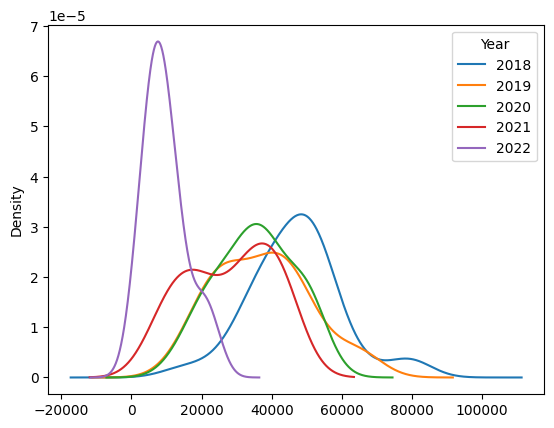

In [25]:
pt['Miles'].plot(kind='kde')

<Axes: ylabel='Density'>

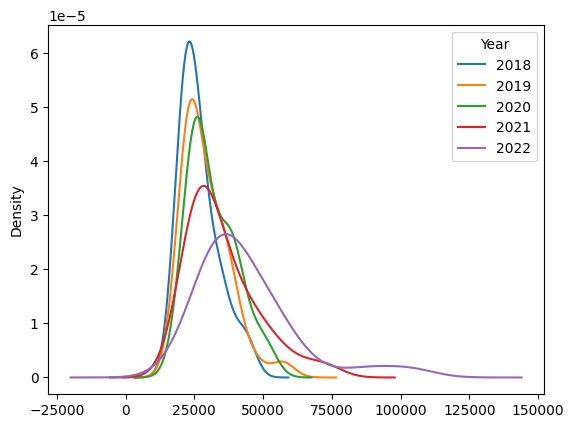

In [27]:
pt['Price'].plot(kind='kde')

### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: https://tinyurl.com/2nq6kugt

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
- It is hard to get inside if you look through the only pivot table. So plot the pivot table.

In [28]:
data=pd.read_csv(' https://tinyurl.com/2nq6kugt')
data.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0


In [30]:
data['required']=data['Actual(MU)']-data['Excess(+) / Shortfall (-)']

###`Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* MAke sure you look at columns name carefully

CSV File - "https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link"

In [ ]:
# code here

###`Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [ ]:
# code here

###`Q 6-10` LOG and EMPLOYEE
6. Show `activity` details month wise. Show count for each `activity`
7. Find employee who did most `activity` in January month.
8. Employee who have worked most no of times on Weekends.
9. Which activity is logged most on buisness days.
10. Week Days wise activity table.
```
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

```

Note(for common field):- Employee file has `EMPLOYEE_ID` and LOG file has `emp_id`

In [ ]:
# code here

### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname).

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`

3. Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

In [ ]:
# code here